In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes datasets

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
data.shape, targets.shape

((442, 10), (442,))

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [9]:
# Build a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model
model = get_model()

In [10]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0078 - mae: 0.8605 - val_loss: 0.7835 - val_mae: 0.7494
Epoch 2/100
337/337 - 0s - loss: 0.9159 - mae: 0.8243 - val_loss: 0.6670 - val_mae: 0.6806
Epoch 3/100
337/337 - 0s - loss: 0.7160 - mae: 0.7319 - val_loss: 0.5195 - val_mae: 0.6090
Epoch 4/100
337/337 - 0s - loss: 0.5683 - mae: 0.6044 - val_loss: 0.4050 - val_mae: 0.5060
Epoch 5/100
337/337 - 0s - loss: 0.5099 - mae: 0.5771 - val_loss: 0.5275 - val_mae: 0.6123
Epoch 6/100
337/337 - 0s - loss: 0.5058 - mae: 0.5768 - val_loss: 0.5851 - val_mae: 0.6455
Epoch 7/100
337/337 - 0s - loss: 0.5280 - mae: 0.5843 - val_loss: 0.3860 - val_mae: 0.4650
Epoch 8/100
337/337 - 0s - loss: 0.5082 - mae: 0.5680 - val_loss: 0.5120 - val_mae: 0.6046
Epoch 9/100
337/337 - 0s - loss: 0.4776 - mae: 0.5599 - val_loss: 0.3968 - val_mae: 0.4916
Epoch 10/100
337/337 - 0s - loss: 0.4626 - mae: 0.5593 - val_loss: 0.4707 - val_mae: 0.5663
Epoch 11/100
337/337 - 0s - loss: 0.4584 - m

Epoch 90/100
337/337 - 0s - loss: 0.0372 - mae: 0.1443 - val_loss: 0.6891 - val_mae: 0.6343
Epoch 91/100
337/337 - 0s - loss: 0.0325 - mae: 0.1291 - val_loss: 0.7162 - val_mae: 0.6480
Epoch 92/100
337/337 - 0s - loss: 0.0319 - mae: 0.1296 - val_loss: 0.6913 - val_mae: 0.6493
Epoch 93/100
337/337 - 0s - loss: 0.0333 - mae: 0.1368 - val_loss: 0.6191 - val_mae: 0.5917
Epoch 94/100
337/337 - 0s - loss: 0.0300 - mae: 0.1238 - val_loss: 0.6331 - val_mae: 0.6045
Epoch 95/100
337/337 - 0s - loss: 0.0316 - mae: 0.1281 - val_loss: 0.6884 - val_mae: 0.6398
Epoch 96/100
337/337 - 0s - loss: 0.0314 - mae: 0.1267 - val_loss: 0.6617 - val_mae: 0.6080
Epoch 97/100
337/337 - 0s - loss: 0.0271 - mae: 0.1118 - val_loss: 0.6730 - val_mae: 0.6314
Epoch 98/100
337/337 - 0s - loss: 0.0272 - mae: 0.1171 - val_loss: 0.6729 - val_mae: 0.6208
Epoch 99/100
337/337 - 0s - loss: 0.0384 - mae: 0.1471 - val_loss: 0.6740 - val_mae: 0.6358
Epoch 100/100
337/337 - 0s - loss: 0.0533 - mae: 0.1807 - val_loss: 0.6416 - val

In [13]:
# Evaluate the model on test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5295 - mae: 0.7133


[0.8481475743982527, 0.71332735]

#### Plot the learning curves

In [14]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


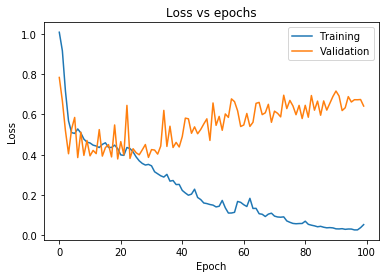

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()